##Data Visualisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Load dataset
main_file = '/content/merged_dataset.csv'
df = pd.read_csv(main_file, encoding='latin1', sep=';', header=0)

# Convert necessary columns to numeric (handling errors gracefully)
numeric_cols = ["Etm", "Water Requirements", "days of water usage", "Fertilizer N", "Fertilizer K", "Fertilizer P", "Root Depth", "Residue"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

sns.set_style("whitegrid")

In [ ]:
print(df.columns)
# Check basic info
df.info()

# Display first few rows
df.head()



Index(['Crop', 'Etm', 'Water Requirements', 'days of water usage',
       'Fertilizer N', 'Fertilizer K', 'Fertilizer P', 'Root Depth', 'Residue',
       'Disease', 'Pest', 'plant spacing', 'soil salinity', 'area',
       'Soil_type', 'Crop (t-2)', 'Crop (t-1)', 'Crop (t)', 'Next Crop'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Crop                 533 non-null    object 
 1   Etm                  523 non-null    float64
 2   Water Requirements   533 non-null    int64  
 3   days of water usage  528 non-null    float64
 4   Fertilizer N         533 non-null    int64  
 5   Fertilizer K         533 non-null    int64  
 6   Fertilizer P         533 non-null    float64
 7   Root Depth           533 non-null    int64  
 8   Residue              533 non-null    int64  
 9   Disease              426 non-

,Crop,Etm,Water Requirements,days of water usage,Fertilizer N,Fertilizer K,Fertilizer P,Root Depth,Residue,Disease,Pest,plant spacing,soil salinity,area,Soil_type,Crop (t-2),Crop (t-1),Crop (t),Next Crop
0,Durum Wheat,5.0,450,120.0,100,60,50.0,100,3000,Oidium,BAVISTIN FL,25,Moderate,Wide,Loamy,Legumes,Cereal,Maize,Maize
1,Durum Wheat,5.0,450,120.0,100,60,50.0,100,3000,Oidium,CORBEL,25,Moderate,Wide,Loamy,Legumes,Cereal,Maize,Maize
2,Durum Wheat,5.0,450,120.0,100,60,50.0,100,3000,Traitement d'hiver,FUNGURAN OH,25,Moderate,Wide,Loamy,Legumes,Cereal,Maize,Maize
3,Durum Wheat,5.0,450,120.0,100,60,50.0,100,3000,Septoriose,OSAM,25,Moderate,Wide,Loamy,Legumes,Cereal,Maize,Maize
4,Durum Wheat,5.0,450,120.0,100,60,50.0,100,3000,Septoriose,OPUS,25,Moderate,Wide,Loamy,Legumes,Cereal,Maize,Maize


In [ ]:
print(df[['Crop (t-2)', 'Crop (t-1)', 'Crop (t)', 'Next Crop']].nunique())
print(df.groupby(['Crop (t-2)', 'Crop (t-1)', 'Crop (t)'])['Next Crop'].value_counts())



Crop (t-2)    26
Crop (t-1)    16
Crop (t)      25
Next Crop     25
dtype: int64
Crop (t-2)  Crop (t-1)  Crop (t)    Next Crop 
 Cabbage    Beans       Carrot      Carrot         1
                        Sunflower   Sunflower     14
            Carrot      Beans       Beans          1
                        Beans       Beans          9
                        Legumes     Legumes        4
                                                  ..
Sunflower   Mustard     Beans       Beans          1
            Onion       Lettuce     Lettuce        1
Tomato      Onion       Legumes     Legumes        1
            Sunflower   Mustard     Mustard        1
Wheat       Sunflower   Maize       Maize          1
Name: count, Length: 120, dtype: int64


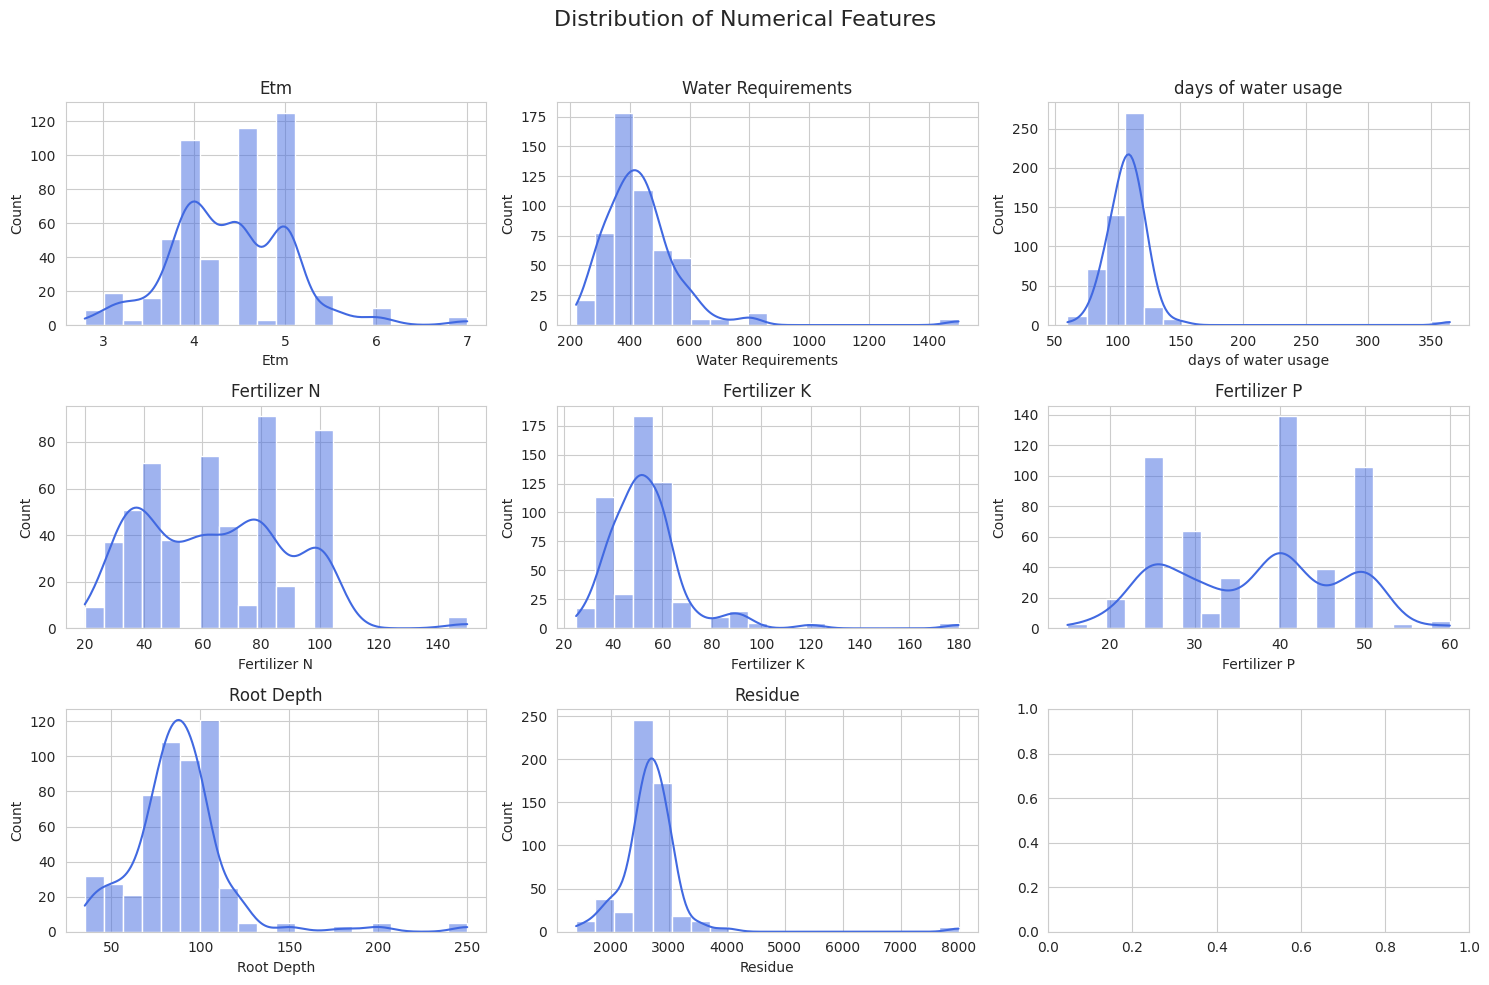

In [ ]:
# 1. Distribution of Numerical Features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle("Distribution of Numerical Features", fontsize=16)
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col].dropna(), bins=20, kde=True, ax=axes[i//3, i%3], color='royalblue')
    axes[i//3, i%3].set_title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


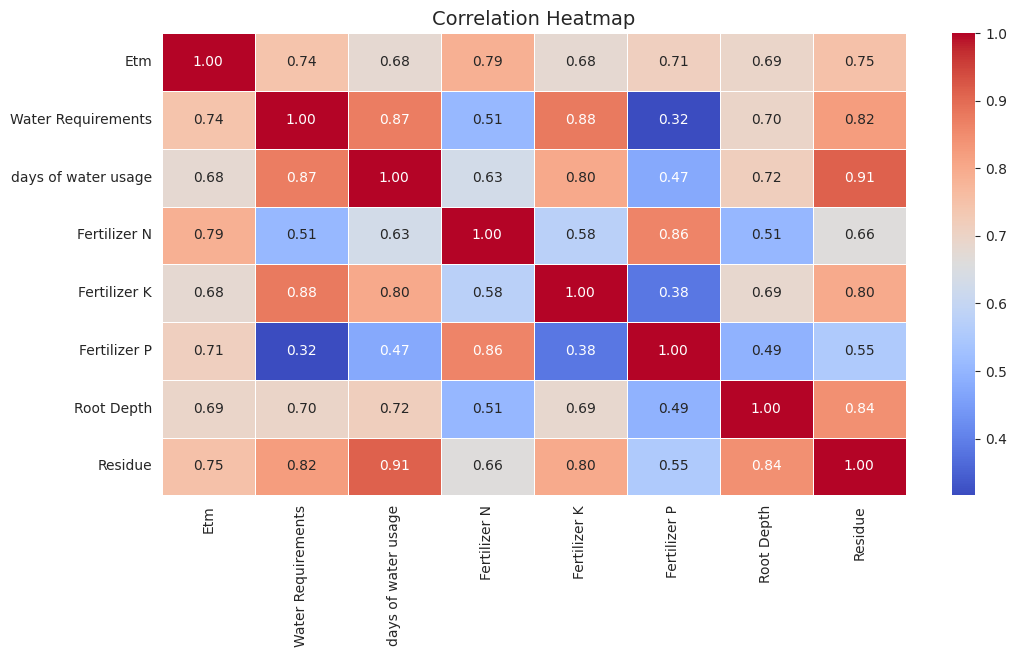

In [ ]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

Feature enginnering

In [ ]:
# Create a new feature for Total Fertilizer Index
df['Total_Fertilizer_Index'] = df['Fertilizer N'] + df['Fertilizer P'] + df['Fertilizer K']

# Drop the original separate fertilizer columns (optional)
#df.drop(columns=['Fertilizer N', 'Fertilizer P', 'Fertilizer K'], inplace=True)

<ipython-input-29-8b33c9377d41>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Crop", order=df["Crop"].value_counts().index, palette="viridis")


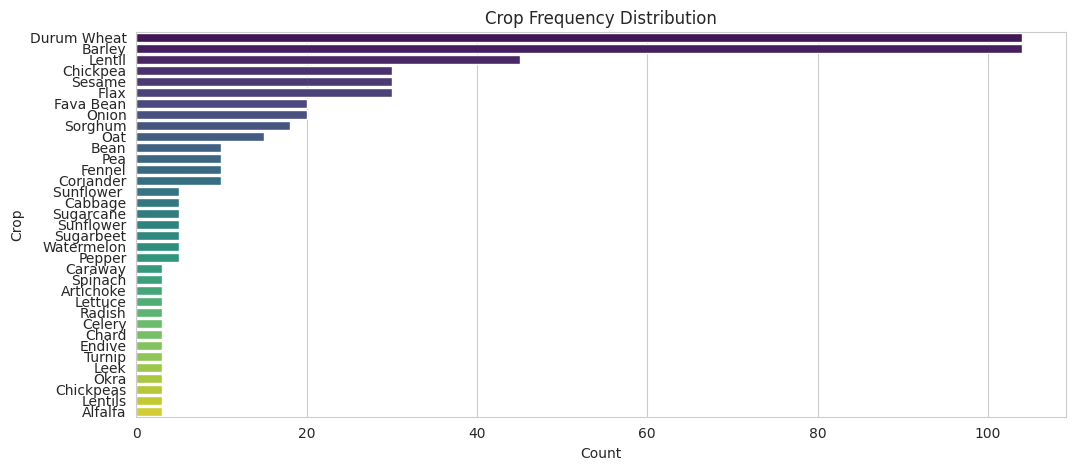

In [ ]:
# 3. Crop Distribution (Bar Plot)
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="Crop", order=df["Crop"].value_counts().index, palette="viridis")
plt.title("Crop Frequency Distribution")
plt.xlabel("Count")
plt.ylabel("Crop")
plt.show()

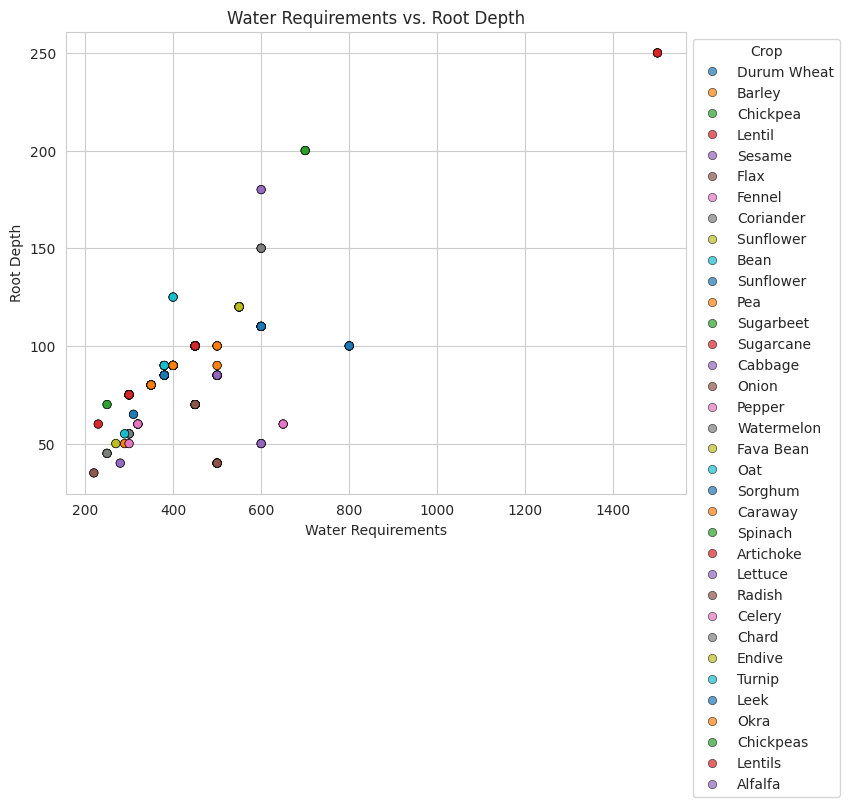

In [ ]:
# 4. Scatter Plot: Water Requirements vs. Root Depth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Water Requirements", y="Root Depth", hue="Crop", palette="tab10", alpha=0.7, edgecolor='black')
plt.title("Water Requirements vs. Root Depth")
plt.xlabel("Water Requirements")
plt.ylabel("Root Depth")
plt.legend(title="Crop", bbox_to_anchor=(1, 1))
plt.show()

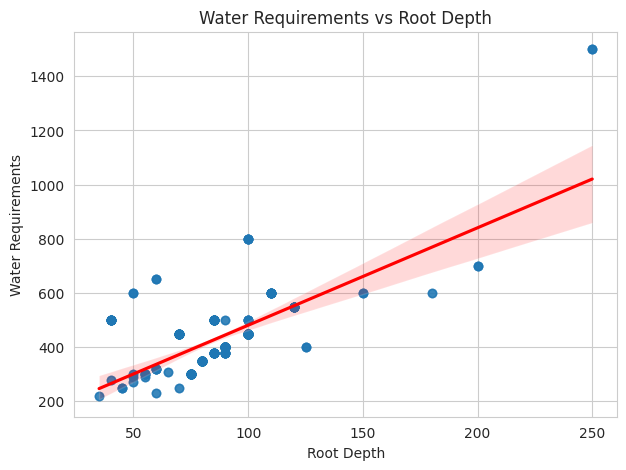

In [ ]:

plt.figure(figsize=(7, 5))
sns.regplot(x=df['Root Depth'], y=df['Water Requirements'], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title("Water Requirements vs Root Depth")
plt.show()

In [ ]:
df['Water_per_Depth'] = df['Water Requirements'] / df['Root Depth']


<ipython-input-33-e44f0f7e9bde>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Crop", y="Fertilizer N", palette="Set2")


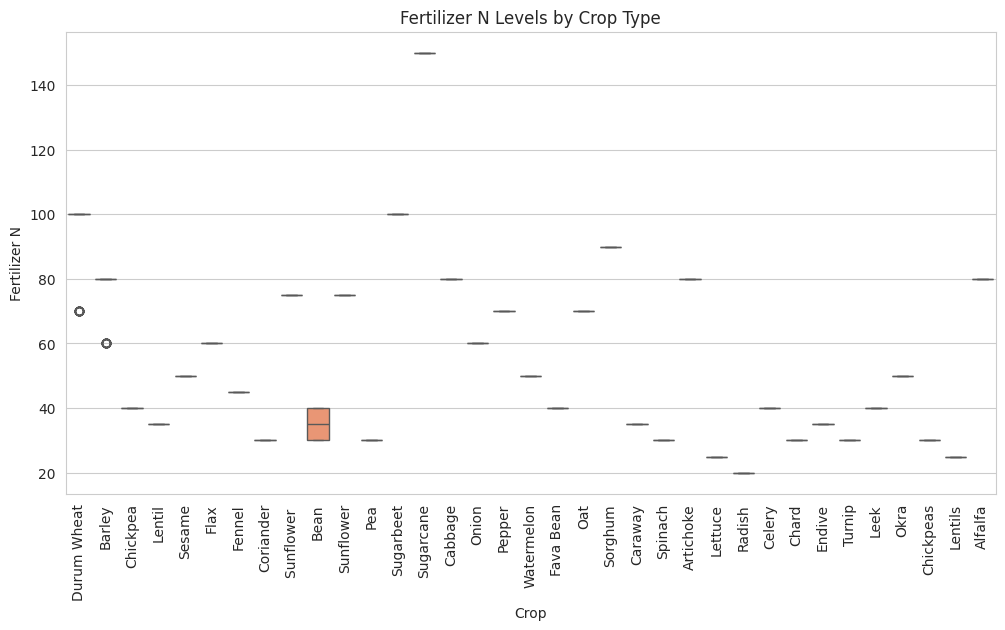

In [ ]:
# 5. Boxplot: Fertilizer Usage by Crop Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Crop", y="Fertilizer N", palette="Set2")
plt.xticks(rotation=90)
plt.title("Fertilizer N Levels by Crop Type")
plt.xlabel("Crop")
plt.ylabel("Fertilizer N")
plt.show()


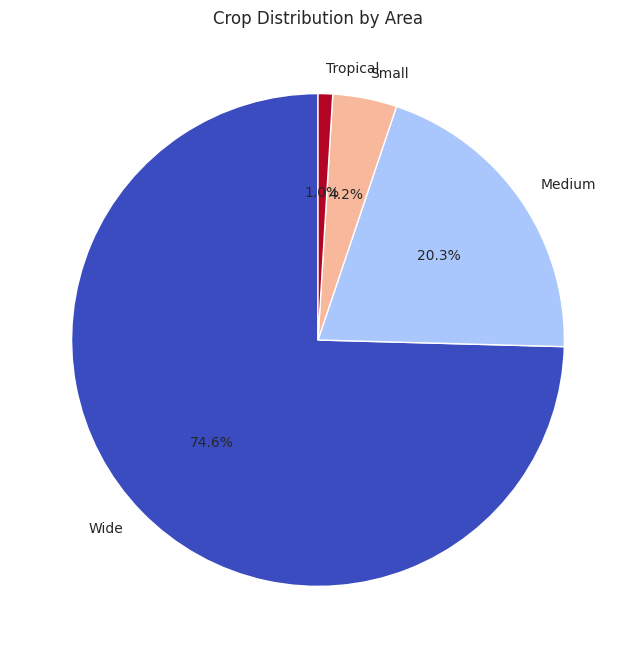

In [ ]:
# 6. Area-wise Crop Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
df["area"].value_counts().plot.pie(autopct="%1.1f%%", cmap="coolwarm", startangle=90)
plt.title("Crop Distribution by Area")
plt.ylabel("")
plt.show()

<ipython-input-35-df366a13b10e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="soil salinity", palette="coolwarm")


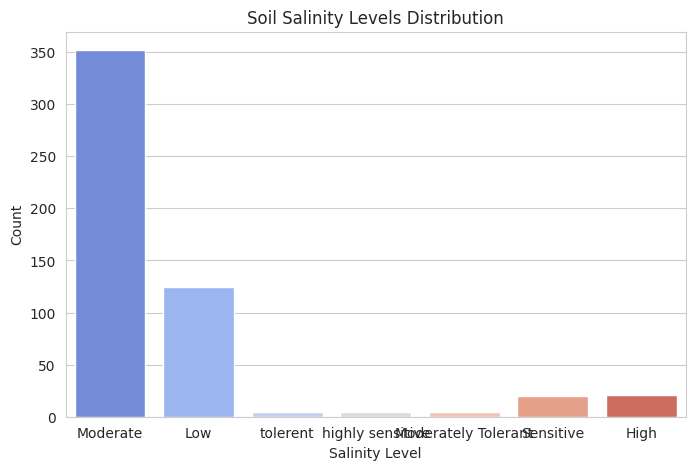

In [ ]:
# 8. Soil Salinity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="soil salinity", palette="coolwarm")
plt.title("Soil Salinity Levels Distribution")
plt.xlabel("Salinity Level")
plt.ylabel("Count")
plt.show()

<ipython-input-36-ae0ae9ab2c1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Pest", order=df["Pest"].value_counts().index, palette="plasma")


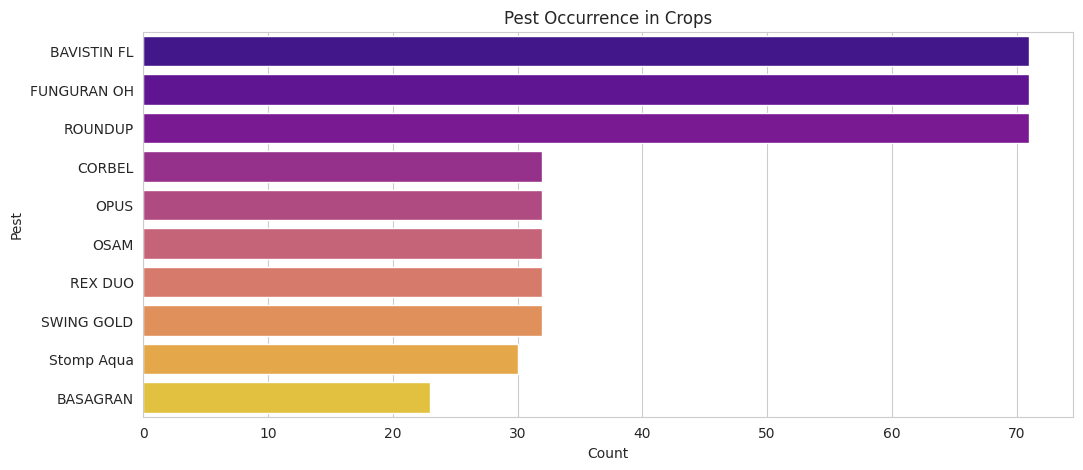

In [ ]:

# 9. Pest Occurrence
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="Pest", order=df["Pest"].value_counts().index, palette="plasma")
plt.title("Pest Occurrence in Crops")
plt.xlabel("Count")
plt.ylabel("Pest")
plt.show()

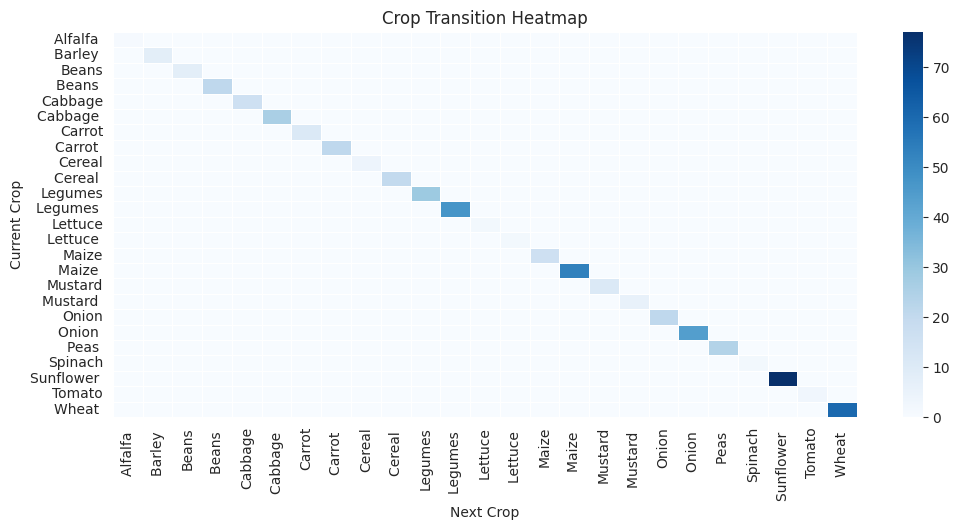

In [ ]:
# 10. Crop Transition Analysis
plt.figure(figsize=(12, 5))
sns.heatmap(pd.crosstab(df["Crop (t)"], df["Next Crop"]), cmap="Blues", linewidths=0.5)
plt.title("Crop Transition Heatmap")
plt.xlabel("Next Crop")
plt.ylabel("Current Crop")
plt.show()


##Data preperation

In [ ]:
def check_missing_values(dataframe):
    # Calculate missing values per column
    missing_counts = dataframe.isnull().sum()

    # Filter columns that have missing values
    missing_columns = missing_counts[missing_counts > 0]

    if missing_columns.empty:
        print("No missing values found in the dataset.")
    else:
        print("Columns with missing values and their counts:")
        print(missing_columns)

# Call the function to display missing values information
check_missing_values(df)

Columns with missing values and their counts:
Etm                     10
days of water usage      5
Disease                107
Pest                   107
area                    10
dtype: int64


Handling Outliers:

In [ ]:

print(df.dtypes)


Crop                       object
Etm                       float64
Water Requirements          int64
days of water usage       float64
Fertilizer N                int64
Fertilizer K                int64
Fertilizer P              float64
Root Depth                  int64
Residue                     int64
Disease                    object
Pest                       object
plant spacing               int64
soil salinity              object
area                       object
Soil_type                  object
Crop (t-2)                 object
Crop (t-1)                 object
Crop (t)                   object
Next Crop                  object
Total_Fertilizer_Index    float64
Water_per_Depth           float64
dtype: object


<ipython-input-40-cfb7b920ba9a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")


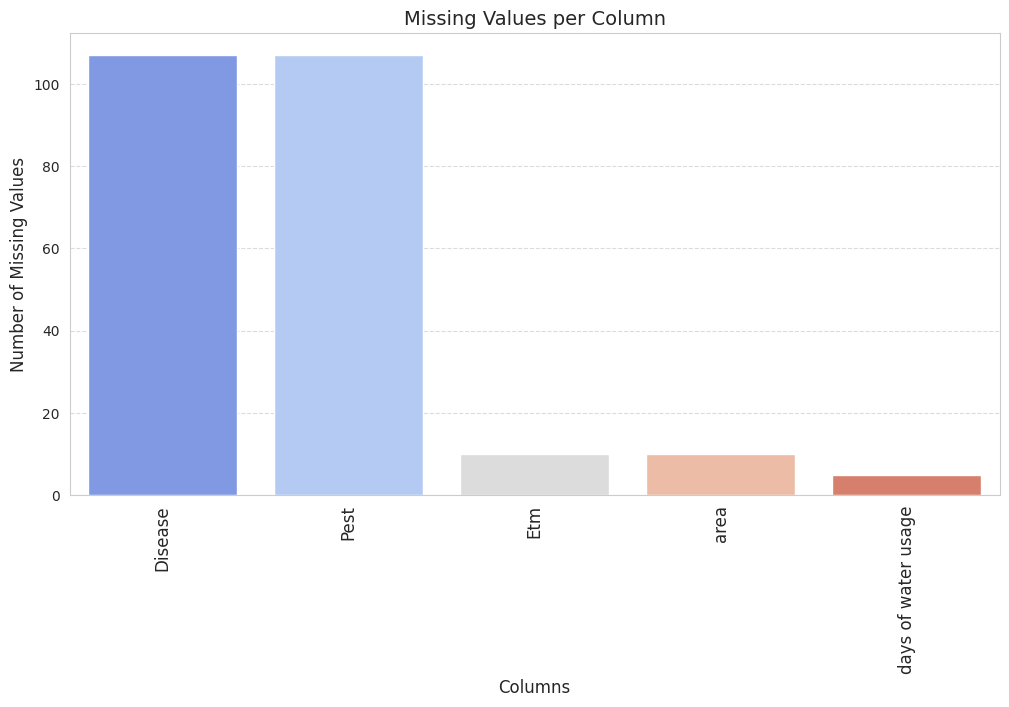

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values

# Sort by missing count
missing_values = missing_values.sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")

# Formatting
plt.xticks(rotation=90, fontsize=12)  # Rotate labels for readability
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.title("Missing Values per Column", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

Categorical variables → Replaced with the mode (most frequent value).
Numerical variables → Replaced with the median[texte du lien](https:// [texte du lien](https://))

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Handling missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:  # If there are missing values
        if df[col].dtype == 'object':  # Categorical column
            df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode
        else:  # Numerical column
            df[col].fillna(df[col].median(), inplace=True)  # Fill with median
# Confirm missing values are handled
print("\nMissing values after handling:\n", df.isnull().sum().sum())

Missing Values:
 Etm                     10
days of water usage      5
Disease                107
Pest                   107
area                    10
dtype: int64

Missing values after handling:
 0


<ipython-input-41-09247295b132>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill with median
<ipython-input-41-09247295b132>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [ ]:
!pip install imbalanced-learn scikit-learn


In [ ]:
df.rename(columns={'days of water usage': 'days_of_water_usage'}, inplace=True)

# Fill missing categorical values with mode
for col in ['Disease', 'Pest', 'area']:
    df[col] = df[col].fillna(df[col].mode()[0])

# ======================
# 1. Drop Rare Classes
# ======================
class_counts = df['Next Crop'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df = df[df['Next Crop'].isin(valid_classes)].copy()

# ======================
# 2. Define Column Types
# ======================

sequential_cols = ['Crop (t-2)', 'Crop (t-1)', 'Crop (t)']
static_cat_cols = ['Soil_type', 'soil salinity', 'area', 'Disease', 'Pest']
numerical_columns = ['Etm', 'Water Requirements', 'days_of_water_usage',
                     'Fertilizer N', 'Fertilizer K', 'Fertilizer P',
                     'Root Depth', 'Residue', 'plant spacing']

# ======================
# 3. Encode Static Data
# ======================
# One-hot encode static categorical features
df_static_cat = pd.get_dummies(df[static_cat_cols], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
df_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_columns]),
                            columns=numerical_columns,
                            index=df.index)

# Combine static features and convert to float32
df_static_encoded = pd.concat([df_numerical, df_static_cat], axis=1)
df_static_encoded = df_static_encoded.astype(np.float32)  # Fix: Convert to float32



# ======================
# 4. Encode Sequential Data
# ======================
for col in sequential_cols:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].astype('category').cat.codes

# ======================
# 5. Encode Target
# ======================
y = df['Next Crop'].astype('category').cat.codes

# ======================
# 6. Split Data
# ======================
X = df_static_encoded

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ======================
# 7. Prepare Final Sets
# ======================
X_static_train = df_static_encoded.loc[X_train.index].values
X_static_val   = df_static_encoded.loc[X_val.index].values
X_static_test  = df_static_encoded.loc[X_test.index].values

X_seq_train = df.loc[X_train.index, sequential_cols].values.astype(np.int32)
X_seq_val   = df.loc[X_val.index, sequential_cols].values.astype(np.int32)
X_seq_test  = df.loc[X_test.index, sequential_cols].values.astype(np.int32)

y_train = np.array(y_train, dtype=np.int32)
y_val   = np.array(y_val, dtype=np.int32)
y_test  = np.array(y_test, dtype=np.int32)

# ======================
# 8. Sanity Check
# ======================
print("Static feature shape:", df_static_encoded.shape)
print("Sequential feature shape:", df[sequential_cols].shape)
print("Target shape:", y.shape)

Static feature shape: (532, 37)
Sequential feature shape: (532, 3)
Target shape: (532,)


In [ ]:
print("X_seq_train dtype:", X_seq_train.dtype)
print("X_static_train dtype:", X_static_train.dtype)
print("y_train dtype:", y_train.dtype)

X_seq_train dtype: int32
X_static_train dtype: float32
y_train dtype: int32


##Modeling

###LSTM


###Graph-Based Model